# House Price Prediction in King County Using Linear and Ridge Regression


#### Predict house prices using regression models based on property characteristics such as size, location, and condition.

The dataset includes home sales from May 2014 to May 2015 in King County, including Seattle. It contains 21 features and 21,613 records.

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


#### Objectives
- Explore data and relationships between features and price

- Build regression models to predict price

- Evaluate model performance using R²

#### Method Overview
- Cleaned missing values in bedrooms and bathrooms

- Performed exploratory analysis (correlations, boxplots, regplots)

- Built baseline linear regression models

- Created a polynomial and Ridge regression pipeline

- Evaluated performance with training and testing sets

In [ ]:
#!pip3 install scikit-learn --upgrade --user

Importing the following libraries:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Module 1: Importing Data Sets


Load the csv:


In [10]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df =pd.read_csv(file_name)

In [11]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Display the data types of each column using the function dtypes


In [12]:
print("The data types of each column:\n ", df.dtypes)

The data types of each column:
  Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


We use the method describe to obtain a statistical summary of the dataframe.


In [13]:
print('statistical summary of the data: ')
df.describe()

statistical summary of the data: 


,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Module 2: Data Wrangling


In [14]:
df.drop(columns= ["id", "Unnamed: 0"], inplace =True)
print('statistical summary of the data after dropping the id & the unamed: ')
df.describe()

statistical summary of the data after dropping the id & the unamed: 


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Check the missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [15]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>


In [16]:
meanbed=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,meanbed, inplace=True)

C:\Users\EL-MOHANDES\AppData\Local\Temp\ipykernel_14068\616635399.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].replace(np.nan,meanbed, inplace=True)


We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code>  parameter top <code> True </code>


In [17]:
meanbath= df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,meanbath, inplace = True)

C:\Users\EL-MOHANDES\AppData\Local\Temp\ipykernel_14068\2853145341.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bathrooms'].replace(np.nan,meanbath, inplace = True)


In [18]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [19]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Module 3: Exploratory Data Analysis


The method <code>value_counts</code> to count the number of houses with unique floor values, and the method <code>.to_frame()</code> to convert it to a dataframe.


In [20]:
df['floors'].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8



The function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers.


<Axes: xlabel='waterfront', ylabel='price'>

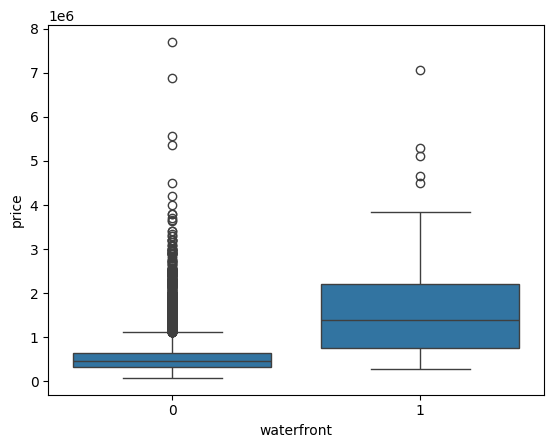

In [21]:
sns.boxplot(x='waterfront', y='price', data= df)

#### The houses without waterview have more outlier but Waterfront homes cost much more

The function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price.


<Axes: xlabel='sqft_above', ylabel='price'>

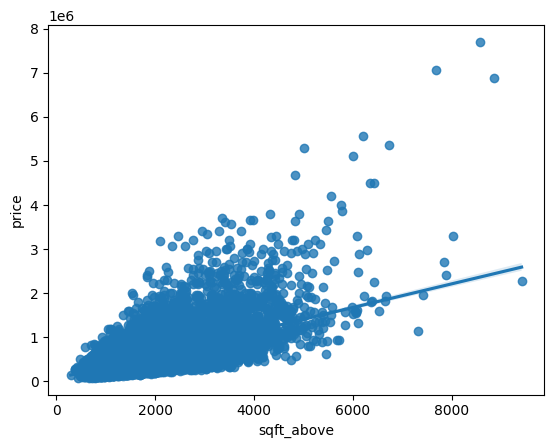

In [22]:
sns.regplot(x='sqft_above', y='price', data= df)

#### It has a positve correlation with the prices

We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.

In [23]:
#handling the date as it may contain meaningful info so I will not exlude it and I will convert it to dteime
df['date'] =pd.to_datetime(df['date'])

In [24]:
df.corr()['price'].sort_values(ascending=False).to_frame().T

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors,yr_renovated,sqft_lot,sqft_lot15,yr_built,condition,long,date,zipcode
price,1.0,0.702035,0.667434,0.605567,0.585379,0.525738,0.397293,0.323816,0.308797,0.307003,0.266369,0.256794,0.126434,0.089661,0.082447,0.054012,0.036362,0.021626,-0.004357,-0.053203


<Axes: xlabel='sqft_living', ylabel='price'>

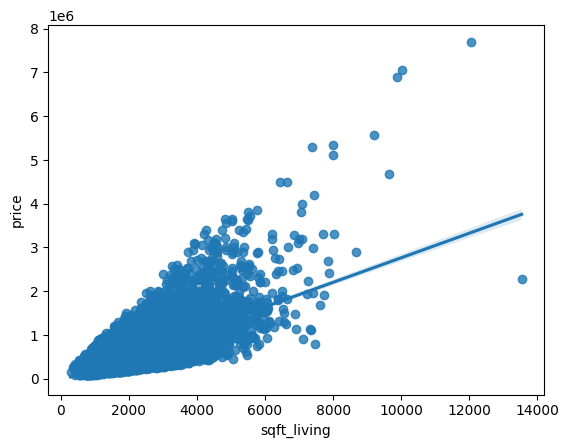

In [25]:
sns.regplot(x='sqft_living', y='price', data=df)

# Module 4: Model Development


We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.


In [26]:
x= df[['long']]
y= df['price']
lm = LinearRegression()
lm.fit(x, y)
lm.score(x,y)

0.00046769430149007363

#### It has nothig to do with the price so we will not use it in our model because it will cause a nosie

Fitting a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2.


In [28]:
x1=df[['sqft_living']]
lm.fit(x1, y)
lm.score(x1, y)

0.4928532179037931

### Fitting a linear regression model to predict the <code>'price'</code> using the list of features:


In [29]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    

Then calculate the R^2.


In [30]:
lmf = LinearRegression()
z= df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
lmf.fit(z, y)
lmf.score(z, y)

0.6576951666037498

I built a list of tuples to define the steps for a pipeline.
Each tuple had two parts
the step name and the constructor.

I used

- ('scale', StandardScaler())

- ('polynomial', PolynomialFeatures(include_bias=False))

- ('model', LinearRegression())

In [31]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

Then I created the pipeline using Pipeline(Input), where Input is that list.

I fit the pipeline on z (features) and y (price).
I then called pipeline.score(z, y) to get the R².

In [32]:
pipeline =Pipeline(Input)
pipeline.fit(z, y)
pipeline.score(z, y)

0.7513408515988734

The R² was 0.7513404173795294.

# Module 5: Model Evaluation and Refinement


Import the necessary modules:


In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

#y=ax+b
#y=ax1+bx2+cx3.....+z

done


I defined the features I wanted to use to predict price and splited the data into training and testing sets with
- train_test_split
- test_size = 0.15
- random_state = 1

In [41]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


I created a Ridge regression model and set the regularization parameter alpha to 0.1.

I fit the model using the training data
<code>Rr.fit(x_train, y_train)<code>

I calculated the R² on the test data
<code>Rr.score(x_test, y_test)<code>


In [42]:
from sklearn.linear_model import Ridge

In [43]:
Rr =Ridge(alpha =0.1)
Rr.fit(x_train, y_train)
Rr.score(x_test, y_test)

0.6478759163939111

The R² value was 0.6478759163939111.

I did a second order polynomial model with Ridge.

Step by step

1- I transformed the features to include polynomial terms up to degree 2

 - I used PolynomialFeatures(degree=2, include_bias=False)
 - I fit and transformed x_train
 - I transformed x_test using the same object

2- I created a Ridge model with alpha = 0.1
 - Rr2 = Ridge(alpha=0.1)

3- I fit the Ridge model on the polynomial version of x_train
 - Rr2.fit(x_train_poly, y_train)

4- I evaluated the model on the polynomial version of x_test
 - Rr2.score(x_test_poly, y_test)


In [79]:
from sklearn.metrics import r2_score 
poly = PolynomialFeatures(degree = 2)
x_train_pr =poly.fit_transform(x_train)
x_test_pr =poly.fit_transform(x_test)
y_hat =Rr.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7002744271710587


### Key Findings

- Living area (sqft_living) showed the strongest correlation with price **(r = 0.70)**

- Simple linear regression on sqft_living gave **R² = 0.49**

- Multiple linear regression using 11 features gave **R² = 0.66**

- Polynomial regression pipeline improved **R² to 0.75**

- Ridge regression with alpha = 0.1 achieved test **R² = 0.65**

- Polynomial Ridge regression improved test **R² to 0.70**

### Insights

- Larger living areas and higher grades strongly raise prices.

- Waterfront access has the biggest single effect on value.

- Condition and renovation year have weaker influence compared to size and location.

- Polynomial features improved accuracy by capturing nonlinear growth between size and price.

- Ridge regularization reduced overfitting and stabilized the model.

- Most predictive power comes from physical characteristics rather than geographic ones.

- The model explains about 70% of price variation, showing strong but improvable performance.

- Future models can improve by including neighborhood-level data or economic indicators.

### Conclusion
Polynomial Ridge regression produced the best generalization performance for predicting house prices in King County.

##### Project bcompleted by Mahmoud Attwany.